#### **Circle Packing Chart**
for lda topics       
based on: [this circular-packing tutorial](https://www.python-graph-gallery.com/circular-packing/)

In [49]:
import pymongo
from pymongo import MongoClient
import os
client = MongoClient()

In [50]:
#list Db's in mongo
client = MongoClient('localhost', 27017)
for database in client.list_databases():
    print(database)

{'name': 'admin', 'sizeOnDisk': 40960, 'empty': False}
{'name': 'arxiv_LDA_DEFAULT', 'sizeOnDisk': 1187840, 'empty': False}
{'name': 'arxiv_LDA_removed', 'sizeOnDisk': 983040, 'empty': False}
{'name': 'arxiv_LDA_rm_20t', 'sizeOnDisk': 831488, 'empty': False}
{'name': 'arxiv_LDA_test2_db', 'sizeOnDisk': 1085440, 'empty': False}
{'name': 'config', 'sizeOnDisk': 110592, 'empty': False}
{'name': 'lda_arxiv_log', 'sizeOnDisk': 73728, 'empty': False}
{'name': 'local', 'sizeOnDisk': 73728, 'empty': False}
{'name': 'test_database', 'sizeOnDisk': 172032, 'empty': False}
{'name': 'to_do_db', 'sizeOnDisk': 8192, 'empty': False}


In [51]:
db_name = 'arxiv_LDA_rm_20t'

In [52]:
db = client[db_name]

In [53]:
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'arxiv_LDA_rm_20t')


In [54]:
db.list_collection_names()

['phrases', 'topics']

In [55]:
topics = db['topics']

In [56]:
words_t0 = list(topics.find())[0]["word_probabilities"]

In [57]:
threshold = 0.005

In [58]:
import pandas as pd
df = pd.DataFrame(words_t0[:(next(x[0] for x in enumerate(words_t0) if x[1]["prob"] < threshold))])

In [59]:
print(df)

            word     prob
0       language  0.07727
1     processing  0.06198
2        natural  0.05795
3    information  0.03300
4        systems  0.03300
5       analysis  0.02013
6   applications  0.01932
7      knowledge  0.01530
8           many  0.01369
9    interaction  0.01288
10     discourse  0.01288
11           see  0.01128
12      modeling  0.01047
13     retrieval  0.01047
14        series  0.00967
15         cases  0.00967
16   statistical  0.00967
17      planning  0.00886
18       purpose  0.00886
19        fields  0.00886
20         tasks  0.00886
21         press  0.00806
22    introduced  0.00806
23        within  0.00806
24         could  0.00725
25  architecture  0.00725
26           nlp  0.00725
27         legal  0.00725
28           eds  0.00645
29     frontiers  0.00645
30          seem  0.00645
31        useful  0.00645
32         image  0.00645
33            th  0.00645
34         build  0.00645
35        figure  0.00645
36       breuker  0.00564
37       com

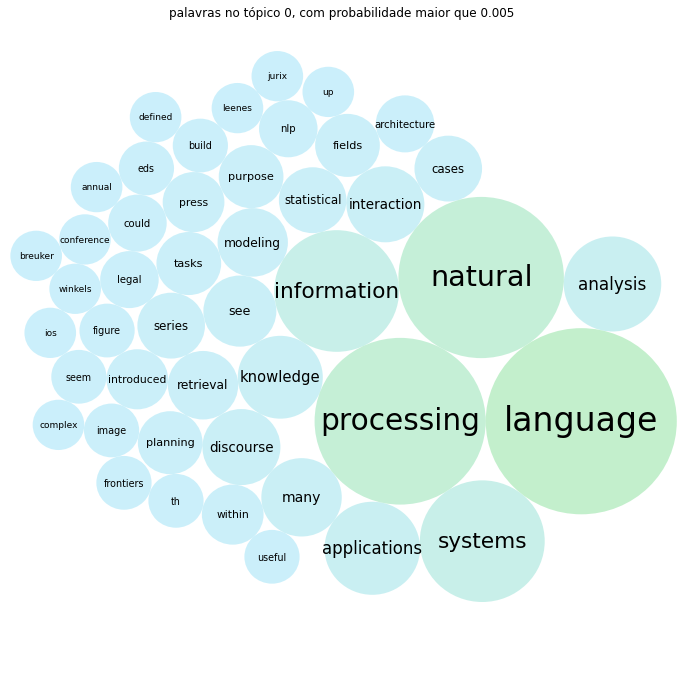

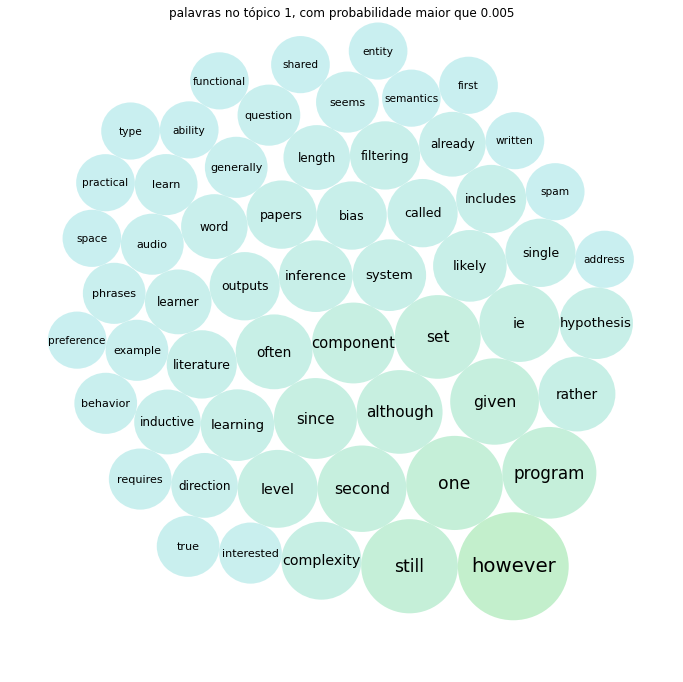

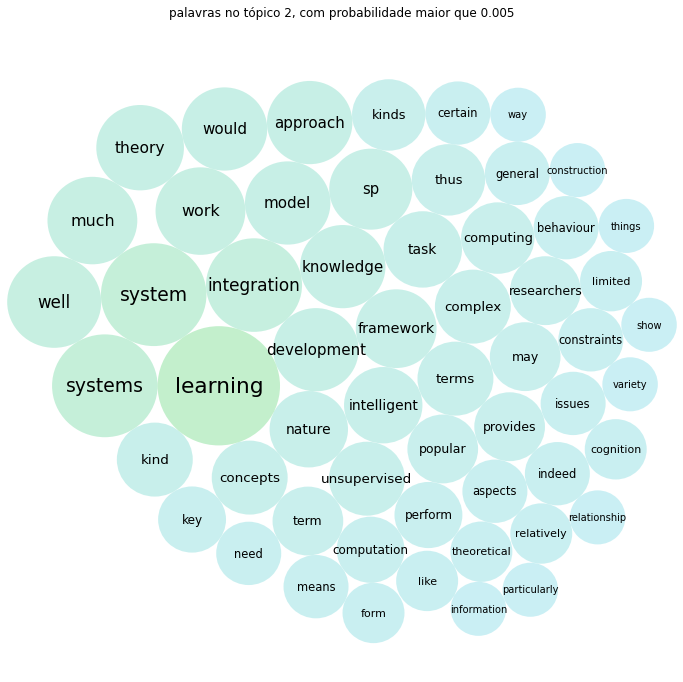

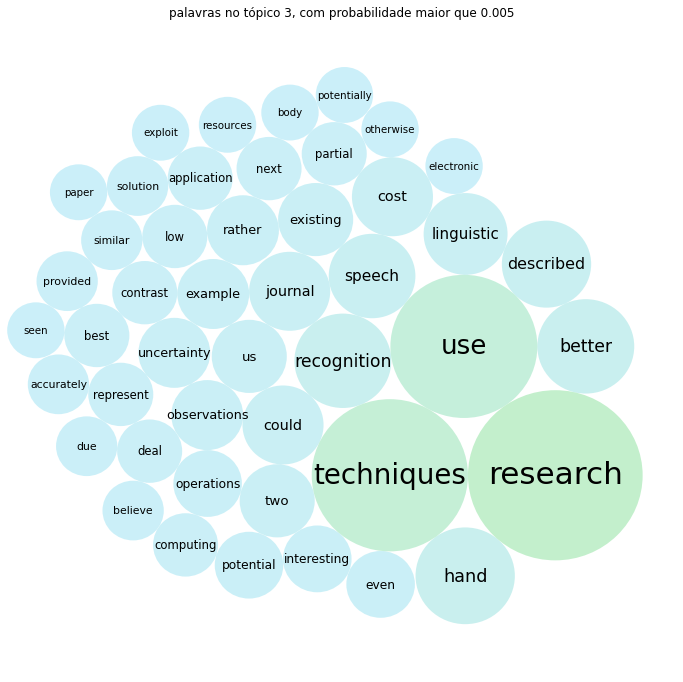

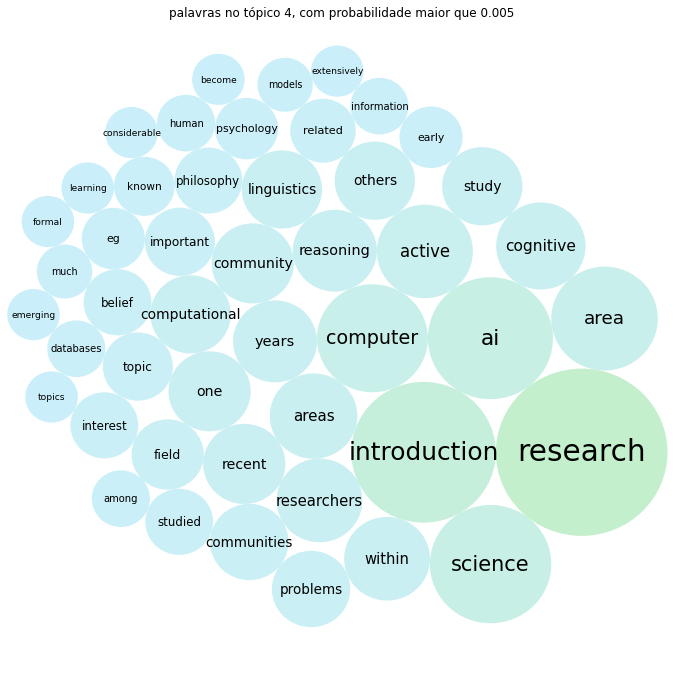

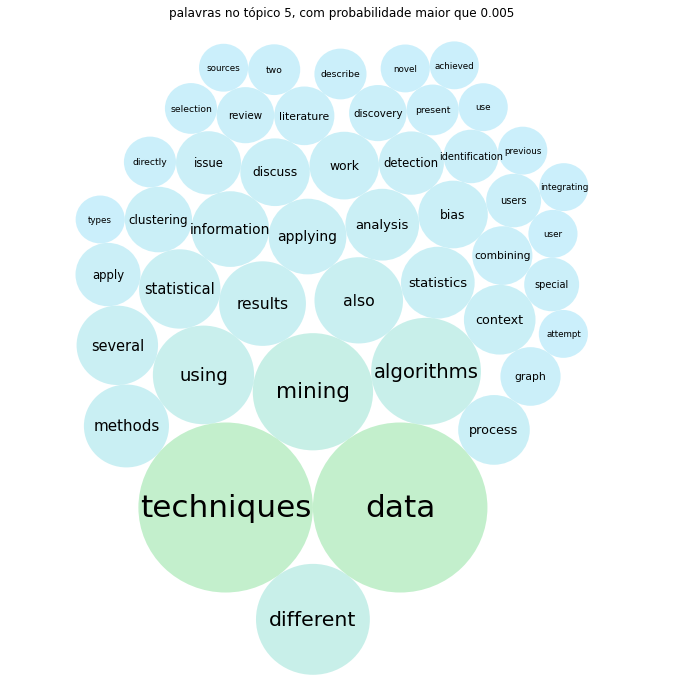

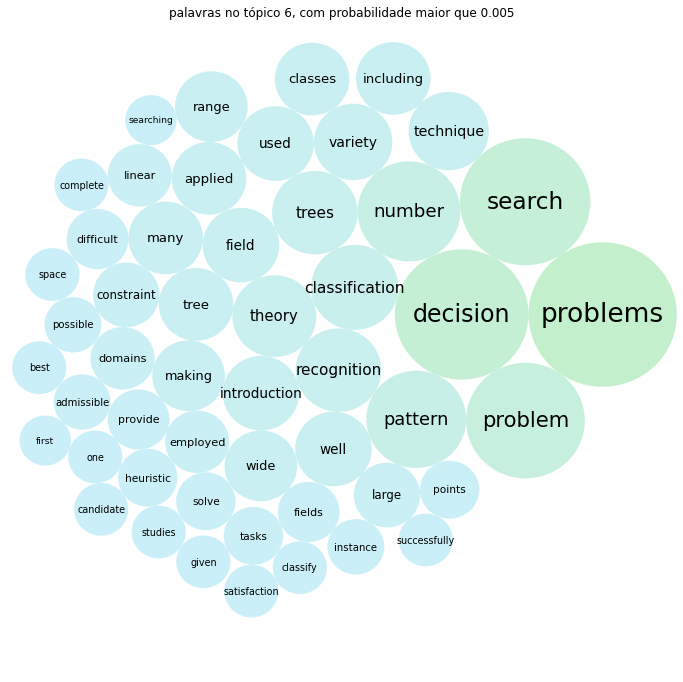

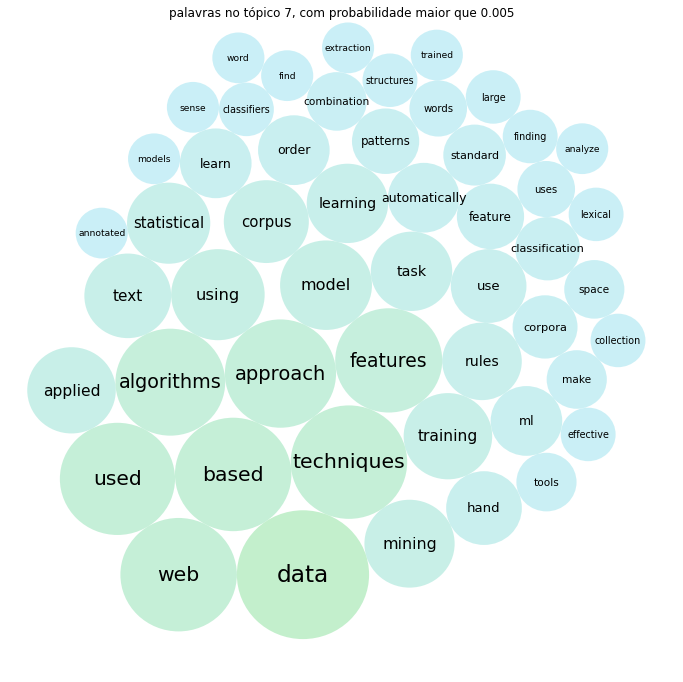

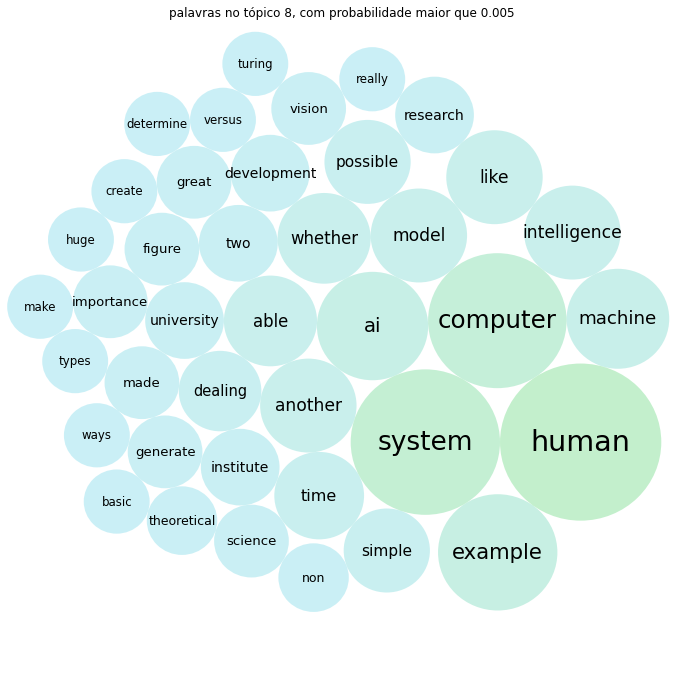

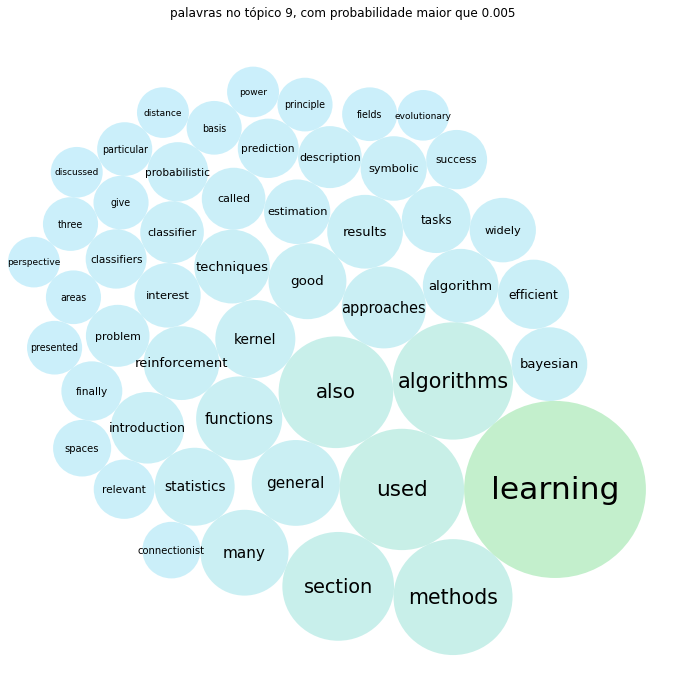

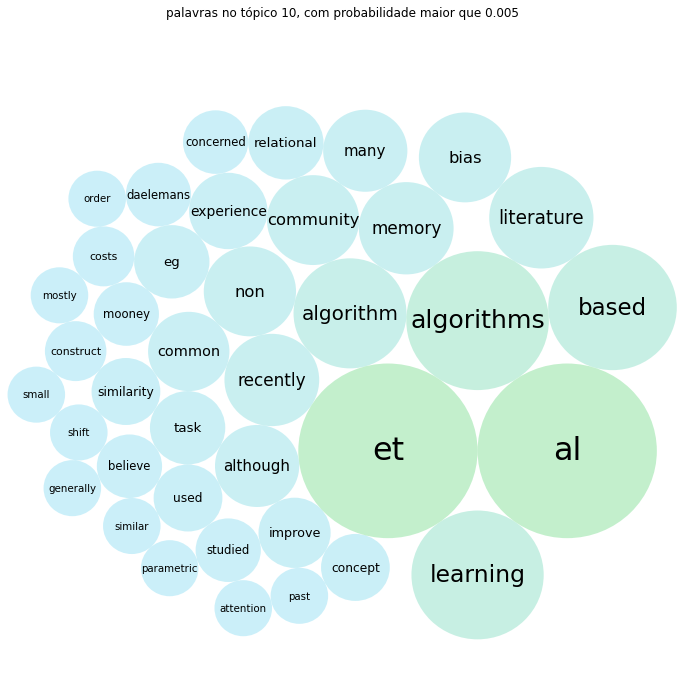

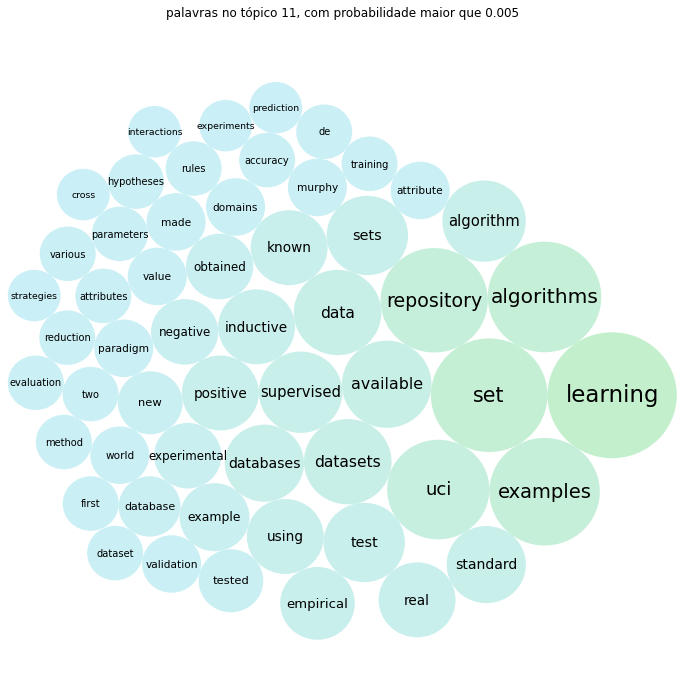

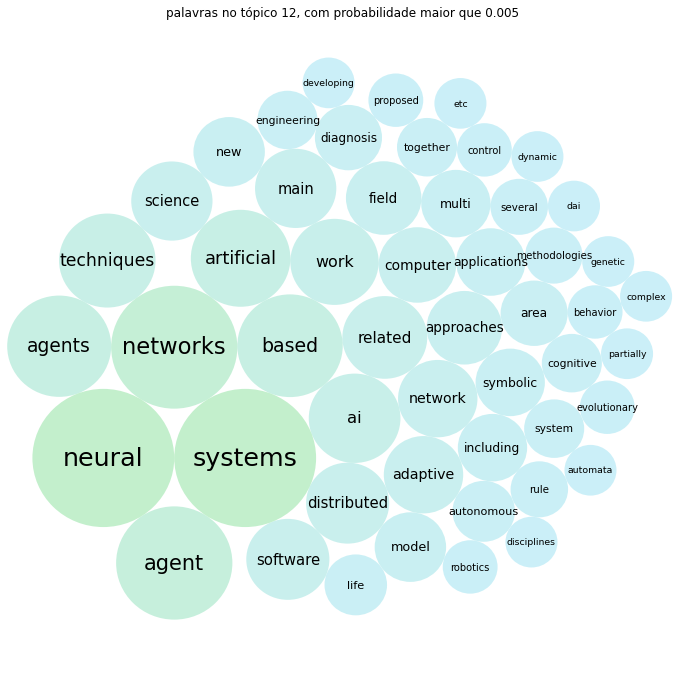

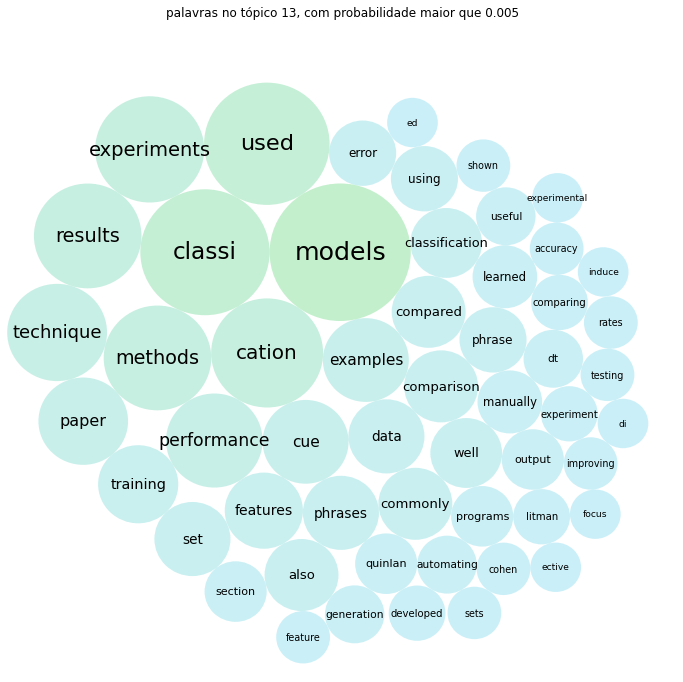

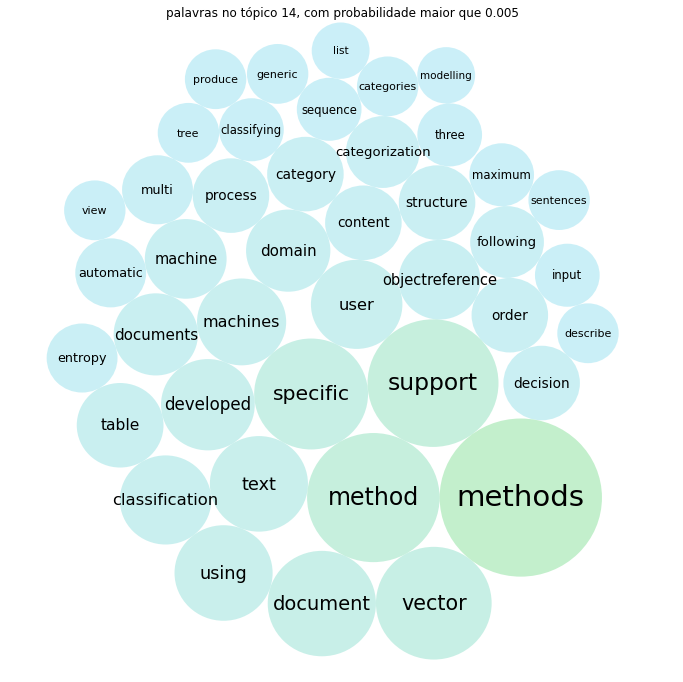

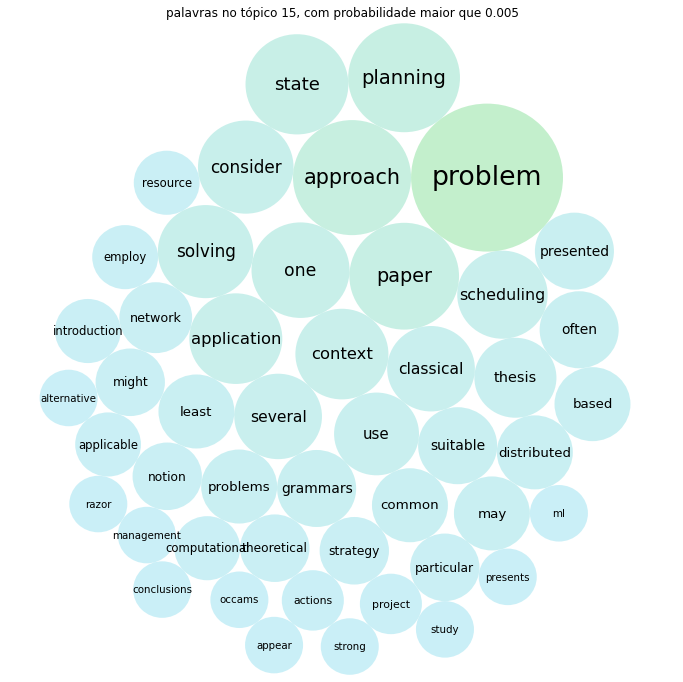

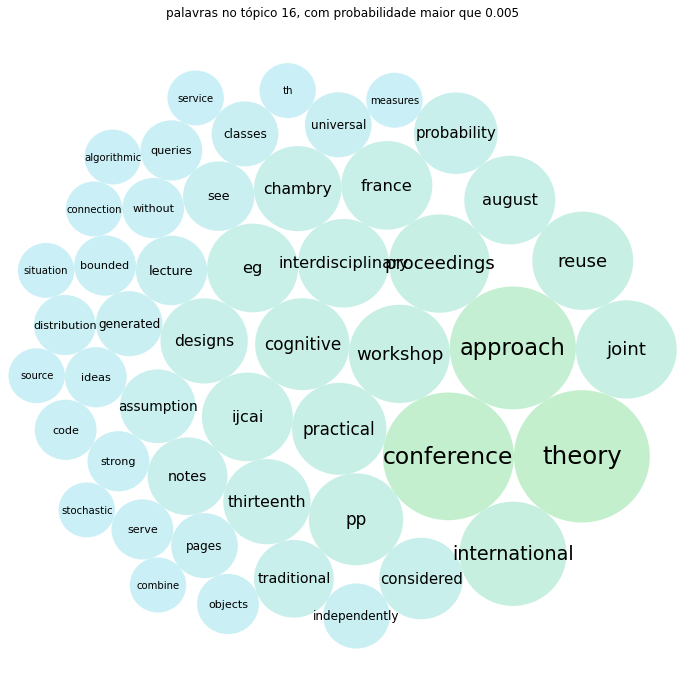

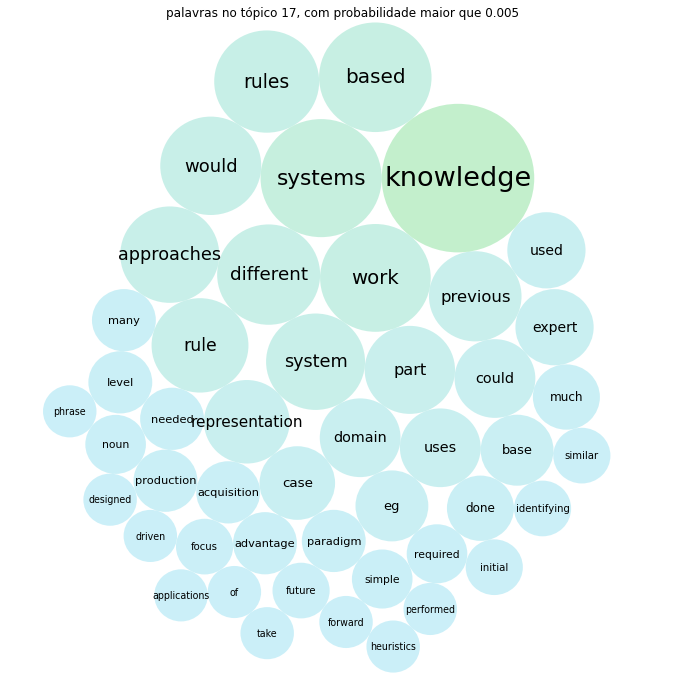

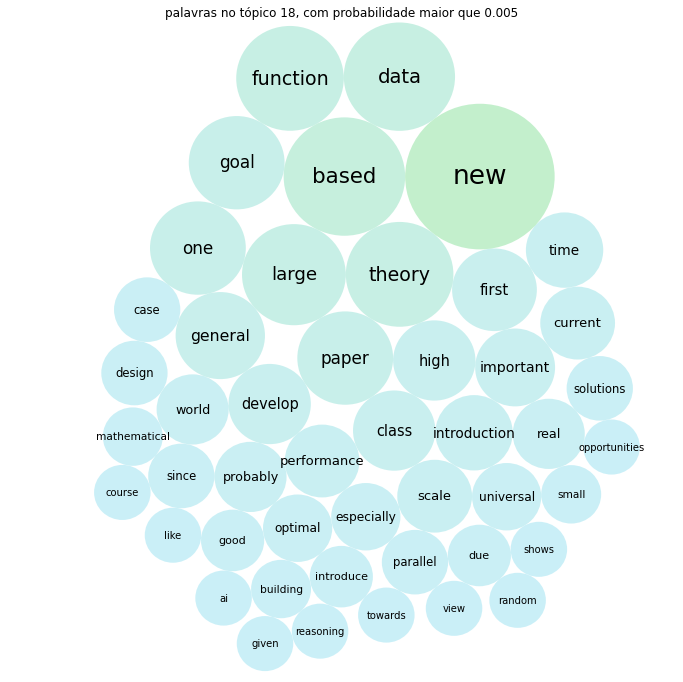

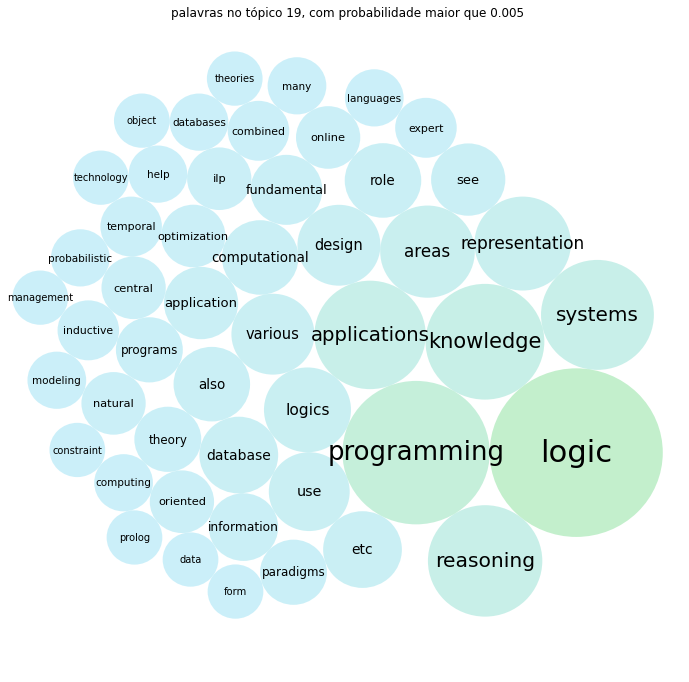

In [60]:
threshold = 0.005
for t,topic in enumerate(list(topics.find())):
    
    words_t = topic["word_probabilities"]
    df = pd.DataFrame(words_t[:(next(x[0] for x in enumerate(words_t) if x[1]["prob"] < threshold))])

    # import the circlify library
    import circlify

    # compute circle positions:
    circles = circlify.circlify(
        df['prob'].tolist(), 
        show_enclosure=False, 
        target_enclosure=circlify.Circle(x=0, y=0, r=1)
    )

    # import libraries
    import matplotlib.pyplot as plt

    # Create just a figure and only one subplot
    fig, ax = plt.subplots(figsize=(12,12))

    # Title
    ax.set_title("palavras no tópico {}, com probabilidade maior que {}".format(t,threshold))

    # Remove axes
    ax.axis('off')

    # Find axis boundaries
    lim = max(
        max(
            abs(circle.x) + circle.r,
            abs(circle.y) + circle.r,
        )
        for circle in circles
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)

    # list of labels
    labels = df[::-1]['word']
    probs = df[::-1]['prob']

    max_prob = max(df['prob'])
    newpath="topic_images/circle_packings/words_removed_w_duplicates/"
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    # print circles
    for circle, label, prob in zip(circles, labels, probs):
        x, y, r = circle
        ax.add_patch(plt.Circle((x, y), r ,alpha=(0.4),color=((0.5-((prob/max_prob)/12)),0.85, (1-((prob/max_prob))/2)), linewidth=0))
        plt.annotate(
            label, 
            (x,y ) ,
            va='center',
            ha='center',
            fontsize=120*r
         )
    plt.savefig("{}CP_words_topic_{}.png".format(newpath,t))